# -To check whether bank note is authentic or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("bank_note_data.csv")

In [3]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


<AxesSubplot:xlabel='Class', ylabel='count'>

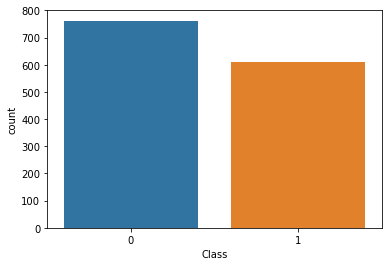

In [4]:
sns.countplot(x="Class",data=data)

In [5]:
x = data.drop("Class",axis=1)

In [6]:
y=data["Class"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [9]:
import tensorflow as tf

In [10]:
x.columns

Index(['Image.Var', 'Image.Skew', 'Image.Curt', 'Entropy'], dtype='object')

In [11]:
image_var = tf.feature_column.numeric_column("Image.Var")
image_skew = tf.feature_column.numeric_column('Image.Skew')
image_curt = tf.feature_column.numeric_column('Image.Curt')
entropy =tf.feature_column.numeric_column('Entropy')

In [12]:
feature_columns=[image_var,image_skew,image_curt,entropy]

In [13]:
input_function = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=5,shuffle=True) 

In [18]:
classifier = tf.estimator.DNNClassifier(hidden_units=[10, 20, 10], n_classes=2,feature_columns=feature_columns)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\rushi\\AppData\\Local\\Temp\\tmpowxskfs1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
classifier.train(input_fn=input_function,steps=500)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\rushi\AppData\Local\Temp\tmpowxskfs1\model.ckpt.
INFO:tensorflow:loss = 1.2087827, step = 0
INFO:tensorflow:global_step/sec: 319.153
INFO:tensorflow:loss = 0.6576488, step = 100 (0.317 sec)
INFO:tensorflow:global_ste

In [21]:
prediction_function = tf.compat.v1.estimator.inputs.pandas_input_fn(x=x_test,batch_size=len(x_test),shuffle=False) 

In [24]:
predictions = list(classifier.predict(input_fn=prediction_function))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\rushi\AppData\Local\Temp\tmpowxskfs1\model.ckpt-480
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [25]:
predictions[0]

{'logits': array([0.8226647], dtype=float32),
 'logistic': array([0.6948017], dtype=float32),
 'probabilities': array([0.3051983, 0.6948017], dtype=float32),
 'class_ids': array([1], dtype=int64),
 'classes': array([b'1'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [28]:
predicts = []
for preds in predictions:
    predicts.append(preds['class_ids'][0])

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(confusion_matrix(y_test,predicts))

[[160  56]
 [ 24 172]]


In [32]:
print(classification_report(y_test,predicts))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       216
           1       0.75      0.88      0.81       196

    accuracy                           0.81       412
   macro avg       0.81      0.81      0.81       412
weighted avg       0.81      0.81      0.81       412



# Comparison -K Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knn = KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
predict =  knn.predict(x_test)

In [37]:
print(classification_report(predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      0.99      1.00       197

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [38]:
print(confusion_matrix(predict,y_test))

[[215   0]
 [  1 196]]
